# Title: Review Rating Prediction 

## 1. Introduction – 
I am using amazon product reviews for the analysis. I will be using existing reviews to find the star rating based on the text. The star rating ranges from 1 to 5, where 1 is lowest and 5 is max rating. For example, if review contains text “Good product to be used.” The model will try to see what can be the star rating for this review. 

## Data Source 
https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products

### Import requried libraries

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Load the data into dataframe.

In [2]:
review_df = pd.read_csv("Amazon_Product_Review_Dataset.csv")
review_df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [3]:
review_df.shape

(5000, 24)

**Too many columns hence we will look at one row for better understanding.**

In [4]:
review_df.iloc[1]

id                                                  AVqVGZNvQMlgsOJE6eUY
dateAdded                                           2017-03-03T16:56:05Z
dateUpdated                                         2018-10-25T16:36:31Z
name                   Amazon Kindle E-Reader 6" Wifi (8th Generation...
asins                                                         B00ZV9PXP2
brand                                                             Amazon
categories             Computers,Electronics Features,Tablets,Electro...
primaryCategories                                            Electronics
imageURLs              https://pisces.bbystatic.com/image2/BestBuy_US...
keys                   allnewkindleereaderblack6glarefreetouchscreend...
manufacturer                                                      Amazon
manufacturerNumber                                            B00ZV9PXP2
reviews.date                                    2017-06-06T00:00:00.000Z
reviews.dateAdded                                  

**There are 24 columns and for our analysis we don't need url or product ID type data. Lets select only required columns.**

In [5]:
review_df = review_df[['name', 'primaryCategories', 'manufacturer', 'reviews.doRecommend', 'reviews.rating', 'reviews.text']]
review_df

,name,primaryCategories,manufacturer,reviews.doRecommend,reviews.rating,reviews.text
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,I thought it would be as big as small paper bu...
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,This kindle is light and easy to use especiall...
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,Didnt know how much i'd use a kindle so went f...
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,I am 100 happy with my purchase. I caught it o...
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,Solid entry level Kindle. Great for kids. Gift...
...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,This is a great tablet for the price. Amazon i...
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,This tablet is the perfect size and so easy to...
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,4,Purchased this for my son. Has room to upgrade...
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,I had some thoughts about getting this for a 5...


**Rename columns for easy access.**

In [6]:
new_columns = ['product_name', 'product_category', 'manufacturer', 'recommend', 'review_rating', 'review_text']
review_df.columns = new_columns
review_df.head()

,product_name,product_category,manufacturer,recommend,review_rating,review_text
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,I thought it would be as big as small paper bu...
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,This kindle is light and easy to use especiall...
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,Didnt know how much i'd use a kindle so went f...
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,I am 100 happy with my purchase. I caught it o...
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,Solid entry level Kindle. Great for kids. Gift...


### Check the dimensions of the data.

In [7]:
review_df.shape

(5000, 6)

We can see there are 5000 rows and 6 columns. 

### Verify if any missing values.

In [8]:
review_df.isnull().sum()

product_name        0
product_category    0
manufacturer        0
recommend           0
review_rating       0
review_text         0
dtype: int64

So we can see that there are no null values in any columns.

In [9]:
review_df.describe()

,review_rating
count,5000.000000
mean,4.596800
std,0.731804
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Review rating is the only numeric data in our dataset. Max is 5 and min is 1 which reconfirms there are null or zero values. 

In [10]:
review_df.describe(include=['O'])

,product_name,product_category,manufacturer,review_text
count,5000,5000,5000,5000
unique,23,4,1,4385
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Electronics,Amazon,Got this for my Daughter-in-Law and she loves ...
freq,845,3276,5000,4


Data summary shows that, there are 23 products from 4 unique categories for one manufacturer. 

### Based on each rating check the text size distribution using histogram.

In [11]:
review_df["review_length"] = review_df["review_text"].apply(len)

### Use box plot for each star rating.

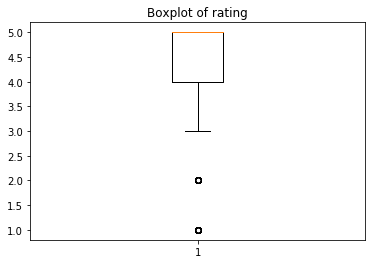

In [12]:
plt.boxplot(review_df.review_rating)
plt.title('Boxplot of rating')
plt.show()

### Histogram of each rating.

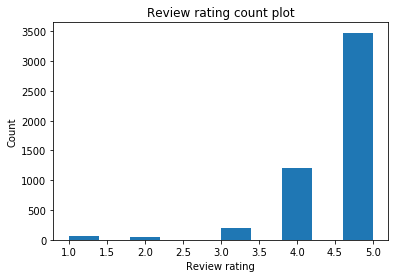

In [13]:
plt.hist(review_df.review_rating)
plt.xlabel('Review rating')
plt.ylabel('Count')
plt.title('Review rating count plot')
plt.show()

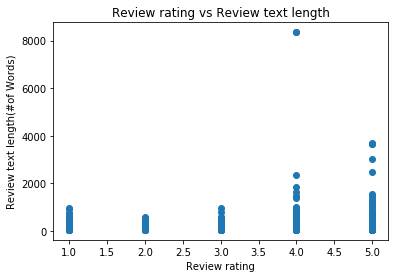

In [14]:
plt.scatter(review_df.review_rating, review_df.review_length)
plt.xlabel('Review rating')
plt.ylabel('Review text length(#of Words)')
plt.title('Review rating vs Review text length')
plt.show()

# Exercise 7.3

In [15]:
review_df.head()

,product_name,product_category,manufacturer,recommend,review_rating,review_text,review_length
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,I thought it would be as big as small paper bu...,211
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,This kindle is light and easy to use especiall...,63
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,Didnt know how much i'd use a kindle so went f...,107
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,I am 100 happy with my purchase. I caught it o...,757
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,Solid entry level Kindle. Great for kids. Gift...,176


#### Group the data by review rating and check the mean of text length per review rating.

In [16]:
group_by_rating = review_df.groupby("review_rating").mean()
group_by_rating

,recommend,review_length
review_rating,,
1,0.031746,300.015873
2,0.129630,186.703704
3,0.543147,180.817259
4,0.979305,176.538079
5,0.996550,152.064405


#### Find the coorelation between selected features. 

In [17]:
group_by_rating.corr()

,recommend,review_length
recommend,1.000000,-0.737276
review_length,-0.737276,1.000000


### 7.3.1 - Preprocessing Steps

#### Lowercase all the text.

In [18]:
review_df["review_text"] = review_df["review_text"].str.lower()
review_df

,product_name,product_category,manufacturer,recommend,review_rating,review_text,review_length
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,i thought it would be as big as small paper bu...,211
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,this kindle is light and easy to use especiall...,63
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,didnt know how much i'd use a kindle so went f...,107
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,i am 100 happy with my purchase. i caught it o...,757
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,solid entry level kindle. great for kids. gift...,176
...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,this is a great tablet for the price. amazon i...,64
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,this tablet is the perfect size and so easy to...,103
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,4,purchased this for my son. has room to upgrade...,148
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,i had some thoughts about getting this for a 5...,136


#### Remove punctuations. 

In [19]:
# Remove Special characters from the review_text.
review_df["review_text"]=review_df["review_text"].str.replace('[^\w\s]',' ')
review_df

,product_name,product_category,manufacturer,recommend,review_rating,review_text,review_length
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,i thought it would be as big as small paper bu...,211
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,this kindle is light and easy to use especiall...,63
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,didnt know how much i d use a kindle so went f...,107
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,i am 100 happy with my purchase i caught it o...,757
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,solid entry level kindle great for kids gift...,176
...,...,...,...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,this is a great tablet for the price amazon i...,64
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,this tablet is the perfect size and so easy to...,103
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,4,purchased this for my son has room to upgrade...,148
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Electronics,Amazon,True,5,i had some thoughts about getting this for a 5...,136


#### Import required libraries for feature extraction. 

In [20]:
#tokenize text with Tfidf
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
# nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk import word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

#### Remove stop words.

In [21]:
stop = stopwords.words('english')
# Remove stop words
review_df["review_text"] = review_df["review_text"].apply(lambda x: [item for item in x.split() if item not in stop])
review_df.head()

,product_name,product_category,manufacturer,recommend,review_rating,review_text,review_length
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,"[thought, would, big, small, paper, turn, like...",211
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,"[kindle, light, easy, use, especially, beach]",63
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,"[didnt, know, much, use, kindle, went, lower, ...",107
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,"[100, happy, purchase, caught, sale, really, g...",757
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,"[solid, entry, level, kindle, great, kids, gif...",176


#### Apply porter stemmer

In [22]:
#Apply a stemmer
stemmer = PorterStemmer()
review_df["review_text"] = review_df["review_text"].apply(lambda x: [stemmer.stem(y) for y in x])
review_df.head()

,product_name,product_category,manufacturer,recommend,review_rating,review_text,review_length
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,"[thought, would, big, small, paper, turn, like...",211
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,"[kindl, light, easi, use, especi, beach]",63
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,"[didnt, know, much, use, kindl, went, lower, e...",107
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,"[100, happi, purchas, caught, sale, realli, go...",757
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,"[solid, entri, level, kindl, great, kid, gift,...",176


#### Join the text after stemming

In [23]:
review_df["review_text"]=review_df["review_text"].apply(lambda x: " ".join(y for y in x))

In [24]:
review_df.head()

,product_name,product_category,manufacturer,recommend,review_rating,review_text,review_length
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,False,3,thought would big small paper turn like palm t...,211
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,kindl light easi use especi beach,63
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,4,didnt know much use kindl went lower end im ha...,107
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,100 happi purchas caught sale realli good pric...,757
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Electronics,Amazon,True,5,solid entri level kindl great kid gift kid fri...,176


#### Split data in training and testing set.

In [25]:
from sklearn.model_selection import train_test_split

selected_data = review_df[(review_df["review_rating"] == 4) | (review_df["review_rating"] == 5)]
selected_data['review_rating'] = selected_data['review_rating'].replace([4,5],['rate4','rate5'])
X = selected_data["review_text"]
y = selected_data["review_rating"]

C:\Users\bhush\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### 7.3.2 - Feature extraction

#### Generate feature matrix using TF-IDF vectorizer. 

In [27]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)

In [28]:
X_train[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [29]:
# Lets check the vocabulary.
import itertools 
tfidf_vocab = tfidf.vocabulary_
print(dict(itertools.islice(tfidf_vocab.items(), 20)))

{'purchas': 2145, 'amazon': 201, 'fire': 1083, 'kid': 1541, 'edit': 902, 'tablet': 2684, '16gb': 23, '75': 86, 'year': 3079, 'old': 1883, 'mother': 1780, 'broke': 443, 'drop': 868, 'took': 2795, 'hour': 1370, 'get': 1181, 'use': 2915, 'cannot': 487, 'separ': 2387, 'away': 296}


#### Lets convert test/validation data to feature matrix

In [30]:
X_test_tfidf = tfidf.transform(X_test)

In [31]:
X_test_tfidf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

#### Generate bag-of-words using count-vectorizer. 

Generated two feature matrix to compare difference between performance with two different feature types.  

In [32]:
bag_of_words = CountVectorizer()
X_train_bow = bag_of_words.fit_transform(X)

In [33]:
X_train_bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# Lets check the vocabulary.
import itertools 
bag_of_words_vocab = bag_of_words.vocabulary_
print(dict(itertools.islice(bag_of_words_vocab.items(), 20)))

{'kindl': 1745, 'light': 1818, 'easi': 1011, 'use': 3285, 'especi': 1094, 'beach': 389, 'didnt': 899, 'know': 1758, 'much': 2015, 'went': 3392, 'lower': 1877, 'end': 1067, 'im': 1585, 'happi': 1459, 'even': 1102, 'littl': 1844, 'dark': 820, '100': 2, 'purchas': 2412, 'caught': 577}


### 8.3.2 - Model Evaluation

#### Using TF-IDF data for Model Evaluation. 

In [35]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [36]:
# Instantiate the classification model 
model = LogisticRegression()

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


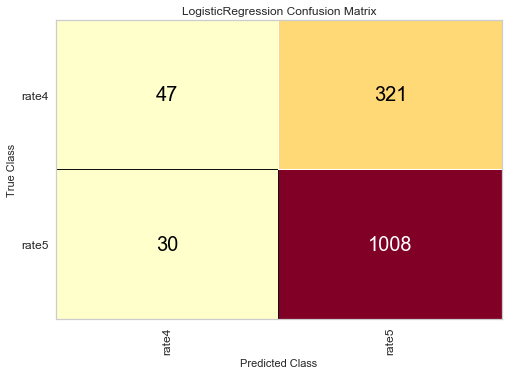

In [37]:
## The ConfusionMatrix visualizer taxes a model
classes = ['rate4','rate5']
cm = ConfusionMatrix(model, classes=classes, percent=False)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test_tfidf, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


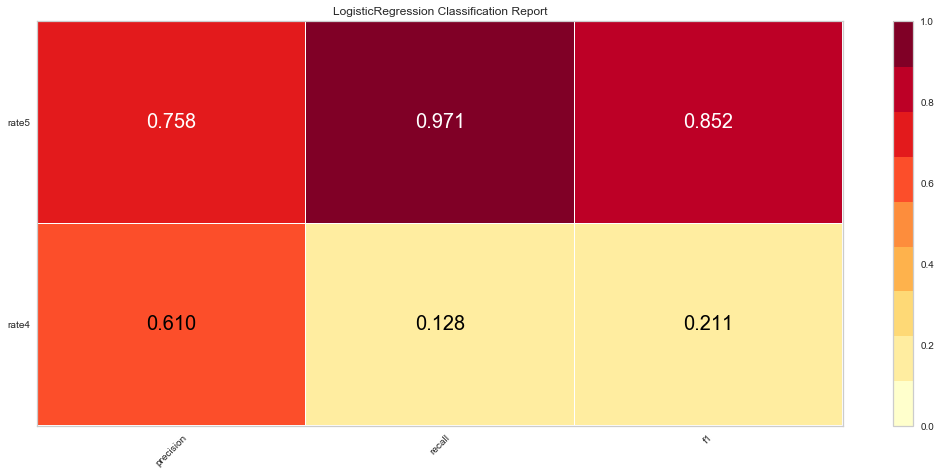

In [38]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_tfidf, y_test)  # Evaluate the model on the test data
visualizer.show()

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


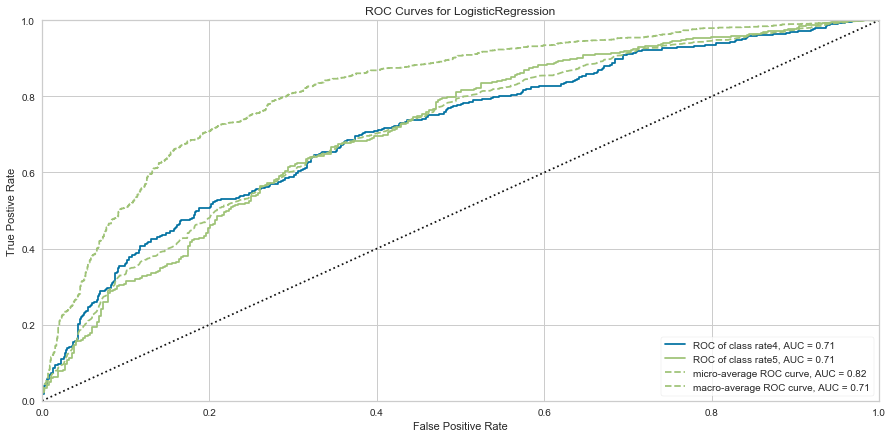

In [39]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, classes=['rate4', 'rate5'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_tfidf, y_test)  # Evaluate the model on the test data
visualizer.show()

# Predict if product is recommended based on the review text using Logistic regression

In [40]:
selected_data = review_df[["review_text", "recommend"]]
selected_data.head()

,review_text,recommend
0,thought would big small paper turn like palm t...,False
1,kindl light easi use especi beach,True
2,didnt know much use kindl went lower end im ha...,True
3,100 happi purchas caught sale realli good pric...,True
4,solid entri level kindl great kid gift kid fri...,True


In [41]:
selected_data['recommend'] = selected_data['recommend'].replace([True, False],["True","False"])
selected_data.head()

C:\Users\bhush\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_text,recommend
0,thought would big small paper turn like palm t...,False
1,kindl light easi use especi beach,True
2,didnt know much use kindl went lower end im ha...,True
3,100 happi purchas caught sale realli good pric...,True
4,solid entri level kindl great kid gift kid fri...,True


In [42]:
selected_data['recommend'].value_counts()

True     4765
False     235
Name: recommend, dtype: int64

In [43]:
X = selected_data["review_text"]
y = selected_data["recommend"]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [45]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)

In [46]:
# X_train['review_rating'] = X_train['review_rating'].replace([1,2,3,4,5],["1","2","3","4","5"])

In [47]:
X_test = tfidf.transform(X_test)

In [48]:
y_test.value_counts()

True     1436
False      64
Name: recommend, dtype: int64

In [49]:
# Instantiate the classification model 
model = LogisticRegression()

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


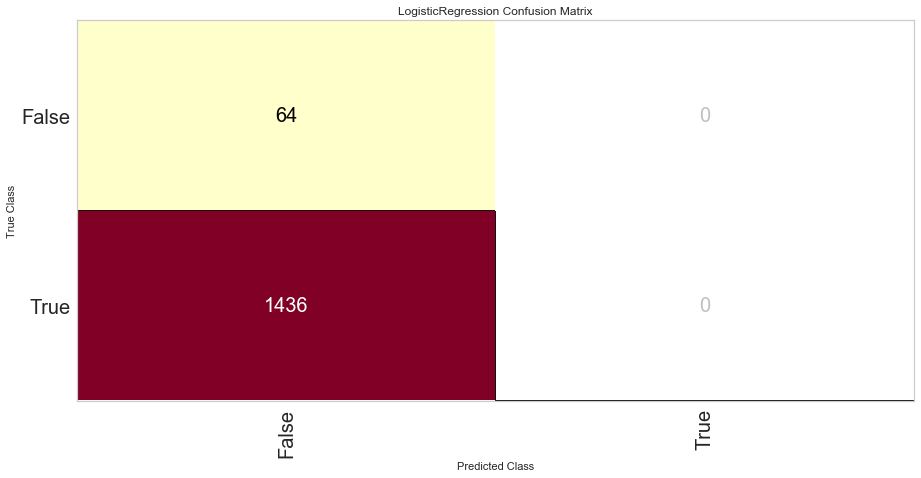

In [82]:
## The ConfusionMatrix visualizer taxes a model
classes = ['False','True']
cm = ConfusionMatrix(model, classes=classes)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\bhush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


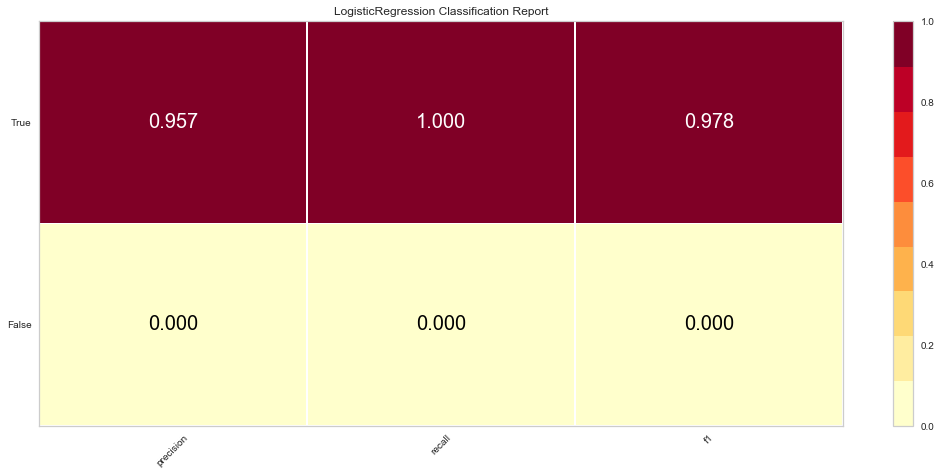

In [51]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [64]:
y_test.value_counts()

True     1436
False      64
Name: recommend, dtype: int64

# Predict review rating based on review text using Multinomial naive Bayes.

In this attempt I am using all the rating (1 to 5).  

In [66]:
X_mnb = review_df["review_text"]
X_mnb

0       thought would big small paper turn like palm t...
1                       kindl light easi use especi beach
2       didnt know much use kindl went lower end im ha...
3       100 happi purchas caught sale realli good pric...
4       solid entri level kindl great kid gift kid fri...
                              ...                        
4995                   great tablet price amazon good job
4996    tablet perfect size easi use read play game pu...
4997    purchas son room upgrad memori allow book game...
4998    thought get 5 year old get screen protector ca...
4999                          steal 8 gb model well punch
Name: review_text, Length: 5000, dtype: object

In [67]:
y_mnb = review_df["review_rating"]
y_mnb

0       3
1       5
2       4
3       5
4       5
       ..
4995    5
4996    5
4997    4
4998    5
4999    5
Name: review_rating, Length: 5000, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_mnb_train, X_mnb_test, y_mnb_train, y_mnb_test = train_test_split(X_mnb,y_mnb,test_size=0.3)

In [69]:
tfidf = TfidfVectorizer()
X_mnb_train = tfidf.fit_transform(X_mnb_train)

In [70]:
X_mnb_test = tfidf.transform(X_mnb_test)

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
# Instantiate the linear regression model 
mnb_model = MultinomialNB()

In [73]:
mnb_model.fit(X_mnb_train, y_mnb_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
predictions = mnb_model.predict(X_mnb_test)

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_mnb_test, predictions))


[[   0    0    0    4   12]
 [   0    0    0    1   13]
 [   0    0    0    1   67]
 [   0    0    0    9  339]
 [   0    0    0    4 1050]]


In [78]:
print(classification_report(y_mnb_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        68
           4       0.47      0.03      0.05       348
           5       0.71      1.00      0.83      1054

    accuracy                           0.71      1500
   macro avg       0.24      0.20      0.18      1500
weighted avg       0.61      0.71      0.59      1500



#  Predict if product is recommended based on the review text using  Multinomial Naive Bayes

In [88]:
y_recom = review_df["recommend"]

In [89]:
X_recom_train, X_recom_test, y_recom_train, y_recom_test = train_test_split(X_mnb,y_recom,test_size=0.3)

In [90]:
tfidf = TfidfVectorizer()
X_recom_train = tfidf.fit_transform(X_recom_train)

In [91]:
X_recom_test = tfidf.transform(X_recom_test)

In [92]:
mnb_recom_model = MultinomialNB()

In [93]:
mnb_recom_model.fit(X_recom_train, y_recom_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [94]:
predictions = mnb_recom_model.predict(X_recom_test)

In [95]:
print(confusion_matrix(y_recom_test, predictions))

[[   0   72]
 [   0 1428]]


In [96]:
print(classification_report(y_recom_test, predictions))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        72
        True       0.95      1.00      0.98      1428

    accuracy                           0.95      1500
   macro avg       0.48      0.50      0.49      1500
weighted avg       0.91      0.95      0.93      1500



C:\Users\bhush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Predict if product is recommended based on the review text using Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier()

In [104]:
decision_model.fit(X_recom_train, y_recom_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
predictions = decision_model.predict(X_recom_test)

In [107]:
print(confusion_matrix(y_recom_test, predictions))

[[  27   45]
 [  25 1403]]


C:\Users\bhush\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


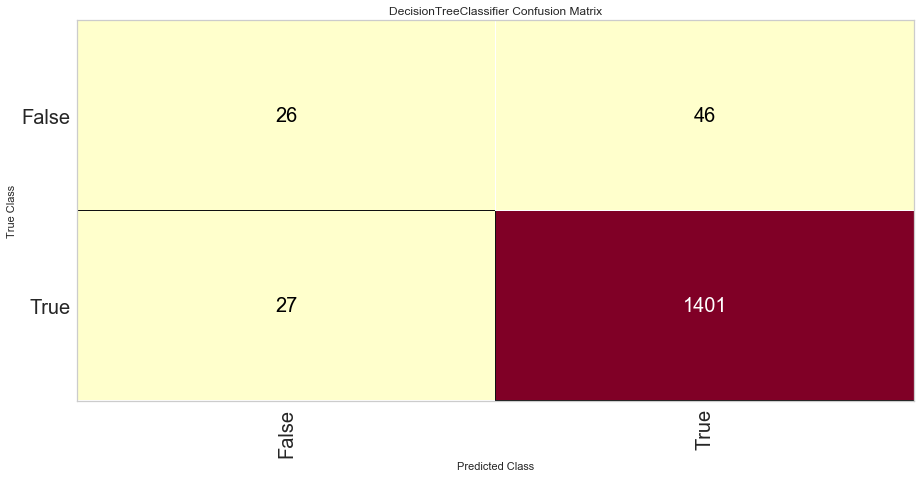

In [98]:
## The ConfusionMatrix visualizer taxes a model
classes = ['False','True']
cm = ConfusionMatrix(decision_model, classes=classes)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_recom_train, y_recom_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_recom_test, y_recom_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

In [108]:
print(classification_report(y_recom_test, predictions))

              precision    recall  f1-score   support

       False       0.52      0.38      0.44        72
        True       0.97      0.98      0.98      1428

    accuracy                           0.95      1500
   macro avg       0.74      0.68      0.71      1500
weighted avg       0.95      0.95      0.95      1500



C:\Users\bhush\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


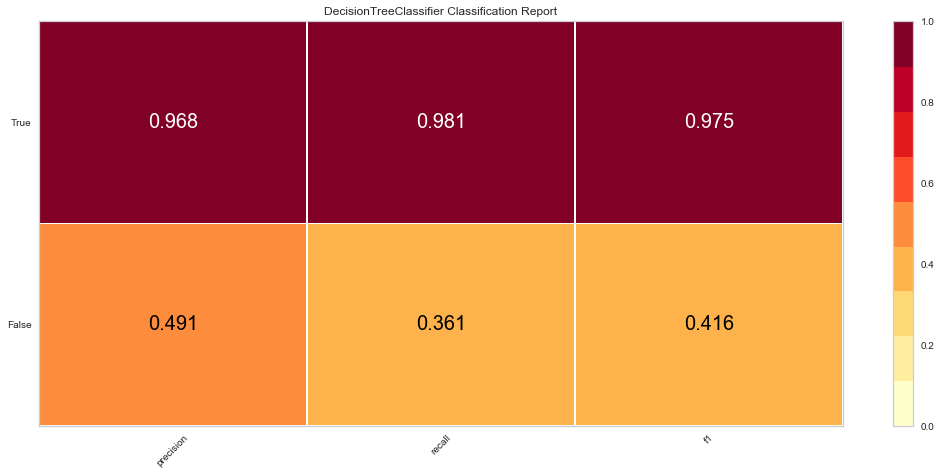

In [99]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20
# Instantiate the visualizer
visualizer = ClassificationReport(decision_model, classes=classes)

visualizer.fit(X_recom_train, y_recom_train)  # Fit the training data to the visualizer
visualizer.score(X_recom_test, y_recom_test)  # Evaluate the model on the test data
visualizer.show()

[Text(781.9118874448551, 378.19975609756096, 'X[2402] <= 0.098\ngini = 0.089\nsamples = 3500\nvalue = [163, 3337]'),
 Text(745.9848575175868, 373.55926829268293, 'X[2874] <= 0.079\ngini = 0.081\nsamples = 3458\nvalue = [147, 3311]'),
 Text(739.5978299749612, 368.91878048780484, 'X[2612] <= 0.162\ngini = 0.079\nsamples = 3453\nvalue = [142, 3311]'),
 Text(715.6464766901156, 364.2782926829268, 'X[1094] <= 0.063\ngini = 0.074\nsamples = 3427\nvalue = [131, 3296]'),
 Text(699.6789078335519, 359.63780487804877, 'X[335] <= 0.451\ngini = 0.071\nsamples = 3416\nvalue = [125, 3291]'),
 Text(693.2918802909264, 354.99731707317073, 'X[864] <= 0.14\ngini = 0.069\nsamples = 3413\nvalue = [122, 3291]'),
 Text(680.5178252056754, 350.35682926829264, 'X[1753] <= 0.137\ngini = 0.064\nsamples = 3384\nvalue = [112, 3272]'),
 Text(674.13079766305, 345.7163414634146, 'X[2003] <= 0.309\ngini = 0.062\nsamples = 3381\nvalue = [109, 3272]'),
 Text(667.7437701204244, 341.0758536585366, 'X[1249] <= 0.109\ngini = 0

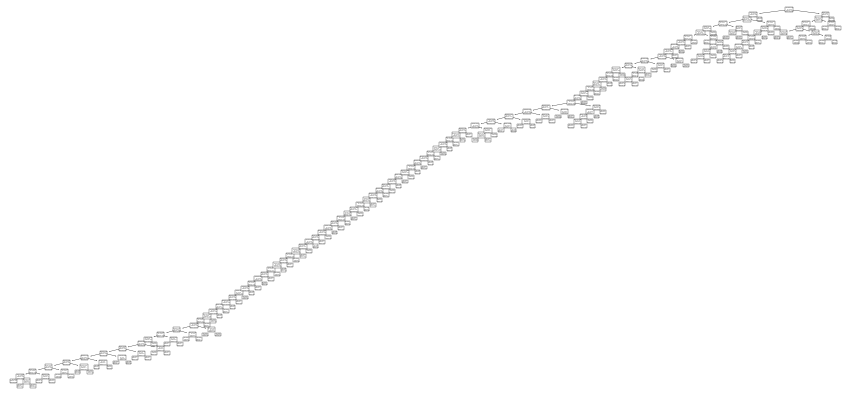

In [101]:
from sklearn import tree
tree.plot_tree(decision_model) 

Looks like because of word features the decision tree has higher depth. 